![](https://cdn.join.com/5b39eb16519cff00234069c1/udacity-logo-l.png)
## Udacity_________________________ Data Analyst Nanodegree Program  `DAND`

# Project 4: Wrangle and Analyze Data - `@WeRateDogs Twitter` 
Friday 2020-06-30
<br />
By: Riad Baziz
<br />
Algeria
<br />
From: **`One Million Arab Coders initiative`**
<a id='top'></a>
## Table of contents
<ul>
<li><a href="#intro">1) Introduction</a></li>
<li><a href="#gather">2) Gathering Data</a></li>
        <ul>
        <li><a href="#manual">Manually</a></li>
        <li><a href="#Program">Programmatically </a></li>
        <li><a href="#api">Querying Twitter - API -</a></li>
        </ul>
<li><a href="#assess">3) Assessing Data For Quality & Tidiness</a></li>
       <ul>
        <li><a href="#visual">Visually</a></li>
        <li><a href="#program">Programmatically</a></li>
       </ul>
<li><a href="#clean">4) Cleaning Data</a></li>
       <ul>
        <li><a href="#tidy">Tidiness</a></li>
        <li><a href="#quality">Quality</a></li>
       </ul>
<li><a href="#store">5) Storing Data</a></li>
<li><a href="#analyze">6) Analyzing & Visualizing Data</a></li>
       <ul>
        <li><a href="#inst1">Insight 1</a></li>
        <li><a href="#inst2">Insight 2</a></li>
        <li><a href="#inst3">Insight 3</a></li>
        <li><a href="#inst4">Insight 4</a></li>
       </ul>    
<li><a href="#references">7) References</a></li>
</ul>

***

<a id='intro'></a>
## 1) Introduction <a href="#top">^</a>

In this project I'll wrangle and analyze **`WeRateDogs`** Twitter data in the steps below:

### Wrangling Data
* **Gathering** three datasets:
    * Dataset 1:  **Twitter archive**, it will gather manually.
    * Dataset 2: **image prediction**, it will gather programmatically. 
    * Dataset 3: **Additional data** (tweet's retweet count and favorite ("like") count) From Twitter `API`.

* **Assessing** data: visually & programmatically 
    * For quality: Detecting quality issues and documenting them.
    * For tidiness: detecting tidiness issues and documenting them.
    
* **Cleaning** data: 
    * cleaning all the quality and tidiness issues documented in the assessing section using Python's libraries and their methods.
    * Storing the cleaned data in a .csv file.
    
### EDA
* **Analyzing & Visualizing** data:
    
    * Exploring and visualizing data to find eventual relationships.
    

In [ ]:
for name in globals():
    print(name)

## Import Packages

In [3]:
#Import required packages
import pandas as pd
import numpy as np
import time as t
import requests
#import tweepy 
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

<a id='gather'></a>
## 2) Gathering Data <a href="#top">^</a>
I'll gather dtata as below:
* **WeRateDogs** Twitter archive **--->** Manually **--->** in **`.csv`** file.
* The tweet **image predictions --->** Programmatically **--->** in **`.tsv`** file
* **Additional data** (retweet/like) count **--->** From Twitter `API` **--->** in **`.JSON`** file.



<a id='manual'></a>
* ### Manually:<a href="#top">^</a>

In [4]:
# Gathering 'WeRateDogs Twitter archive' dataset Manually
twitter_archive = pd.read_csv('./twitter-archive-enhanced.csv', encoding = 'utf-8')


<a id='Program'></a>
* ### Programmatically:<a href="#top">^</a>

In [5]:
# Gathering 'The tweet image predictions' dataset Programmatically

# Assign url
img_pred_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(img_pred_url)

# save the downloaded file 
with open('image_predictions.tsv', mode ='wb') as outfile:
    outfile.write(response.content)

#Read TSV file
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t', encoding = 'utf-8')

 <a id='api'></a>
* ### Querying Twitter `API`:<a href="#top">^</a>

> **API Object**

In [5]:
# Gathering 'Additional Data' from 'Twitter API'

# Keys & Tokens
consumer_key = 'YAToicRyrZOsxGmimJ7itvoxp' #'<MY_CONSUMER_KEY>'
consumer_secret = 'r3XsBc0dpPVF8vCjBjM3ify2AQKB839H4edYas1DOs3x9XcCDr' #'<MY_CONSUMER_SECRET>'
access_token = '1263094555081093120-wrDeZesW2fPqjq04cCSCUJrAnudiEZ' #'<MY_ACCESS_TOKEN>'
access_token_secret = 'cHO0cUXpkfqHg4Bg3w2nXOGeLDRhIenDn0TQ06ES8mtuy' #'<MY_ACCESS_TOKEN_SECRET>'

# Create an OAuthHandler instance
auth = tweepy.OAuthHandler(consumer_key , consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Create API
api = tweepy.API(auth_handler= auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

> **JSON Data**


In [6]:
# Using api object create a JSON Data file named: tweet_json.txt and based on the tweetIDs column from the twitter_archive

# Empty list to store the unretrieved tweetIDs
start = t.time()
missing_tweets = [] 

# Querying each tweet ID and writing its JSON data to the tweet_json.txt file
with open('tweet_json.txt', 'a', encoding='utf8') as file:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended') #tweet_mode = "extended" to retrieve the full text
            json.dump(tweet, file)
            file.write('\n')
            
        except Exception as err_msg:
            print(str(tweet_id)+ " - " + str(err_msg))
            missing_tweets.append(tweet_id)

# Calculate spending time executing this code 
print('Spending time is: ', np.round((t.time() - start)/60), ' minutes')

888202515573088257 - [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 - [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 - [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 - [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 - [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 - [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 - [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 - [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 - [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 - [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 - [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 - [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 - [{'code

Rate limit reached. Sleeping for: 262


754011816964026368 - [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 - [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 156


Spending time is:  38.0  minutes


In [7]:
len(missing_tweets)

24


**Observations:** 

**24** missing tweets:
* **24** unfound status.
* **2** Rate limit reached.



In [13]:
# Re-run the code above for the tweetID not founded 

# Empty list for to store secondly the unretrieved tweetIDs
start_2 = t.time()
missing_tweets_2 = []

# Querying each missing tweetID and appending its JSON data to the existing tweet_json.txt file
with open('tweet_json.txt', 'a', encoding='utf8') as file:
    for tweet_id in missing_tweets:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet, file)
            file.write('\n')
            
        except Exception as err_msg:
            print(str(tweet_id)+ " - " + str(err_msg))
            missing_tweets_2.append(tweet_id)
            
# Calculate spending time executing this code 
print('Spending time is: ', np.round((t.time() - start_2)), ' seconds')

888202515573088257 - [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 - [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 - [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 - [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 - [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 - [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 - [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 - [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 - [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 - [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 - [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 - [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 - [{'code

In [14]:
len(missing_tweets_2)

24


**Observations:** 

**24** missing tweets:
* **24** status still unfounded.

> **JSON Data To DataFrame**


In [6]:
# Read text file line by line to create a DataFrame

# Create empty list
tweets_list = []

# Reading the 'tweet_json.txt' file line by line and putting each line in 'tweets_list' 
with open('tweet_json.txt', mode='r') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_list.append(tweet)
        except:
            continue

# Create DataFrame from tweets_list
twitter_api = pd.DataFrame(tweets_list)
twitter_api = twitter_api[['id', 'retweet_count', 'favorite_count']]


<a id='assess'></a>
## 3) Assessing Data <a href="#top">^</a>
**Key Points**
Key points to keep in mind when data wrangling for this project:

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* Cleaning includes merging individual pieces of data according to the rules of tidy data.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

Assessing three Datasets for (quality and tidiness) visually and then programatcally


<a id='visual'></a>
* ### Visually:<a href="#top">^</a>

In [7]:
            all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(twitter_api))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

In [8]:
len(twitter_archive[((twitter_archive.doggo != 'None') & (twitter_archive.pupper != 'None')) |
               ((twitter_archive.doggo != 'None') & (twitter_archive.floofer != 'None')) |
               ((twitter_archive.doggo != 'None') & (twitter_archive.puppo != 'None'))])

14

In [9]:
twitter_archive[twitter_archive.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [10]:
#### twitter_archive[(twitter_archive.rating_denominator != 10) | (twitter_archive.rating_numerator > 20) ]

In [11]:
twitter_archive[twitter_archive.tweet_id == 817777686764523521].iloc[0]['text']

'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'

**older**-- Doggo--->Puppo--->Pupper --**younger**     // --->Floofer

In [12]:
# Display the Twitter Archive Dataset
twitter_archive



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
# Display the Image predictions Dataset
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [14]:
# Display the Twitter API Dataset
twitter_api


,id,retweet_count,favorite_count
0,892420643555336193,7675,36054
1,892177421306343426,5674,31097
2,891815181378084864,3762,23404
3,891689557279858688,7848,39325
4,891327558926688256,8445,37560
...,...,...,...
2327,666049248165822465,40,96
2328,666044226329800704,131,271
2329,666033412701032449,41,112
2330,666029285002620928,42,121


<a id='program'></a>
* ### Programmatically:<a href="#top">^</a>

#### Twitter archive 

In [15]:
# Twitter Archive Dataset info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
# Missing values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
# Duplicated values:
twitter_archive.duplicated().sum()

0

In [18]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Dido         1
Vinnie       1
Daniel       1
Kody         1
Bertson      1
Name: name, Length: 957, dtype: int64

In [19]:
twitter_archive.name.isnull().sum()

0

In [20]:
pd.set_option('display.max_colwidth',1)
pd.set_option('display.max_rows', 109)
twitter_archive[twitter_archive['name'].str.islower()][['tweet_id','text','name']]

,tweet_id,text,name
22,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
56,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
118,869988702071779329,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,quite
169,859196978902773760,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
193,855459453768019968,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
335,832645525019123713,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,not
369,828650029636317184,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
542,806219024703037440,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
649,792913359805018113,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
682,788552643979468800,RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX,mad


In [21]:
twitter_archive.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [22]:
twitter_archive.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [23]:
twitter_archive.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [24]:
twitter_archive.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [25]:
len(twitter_archive[(((twitter_archive.doggo != 'None') & (twitter_archive.pupper != 'None')) |
               ((twitter_archive.doggo != 'None') & (twitter_archive.floofer != 'None')) |
               ((twitter_archive.doggo != 'None') & (twitter_archive.puppo != 'None')))])

14

In [26]:
twitter_archive.retweeted_status_id.notnull().sum()

181

In [27]:
twitter_archive.in_reply_to_status_id.notnull().sum()

78

In [28]:
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [29]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [30]:
twitter_archive.rating_numerator.max()

1776

In [31]:
len(twitter_archive[(twitter_archive.rating_denominator != 10)])

23

In [32]:
len(twitter_archive[(twitter_archive.rating_numerator > 20)])

24

In [33]:
extr=twitter_archive.text.str.extract(r"(\d?\d?\d/\d\d?)", expand=False)

In [34]:
print(sum(extr.value_counts()))
extr.value_counts()

2356


12/10     558
11/10     463
10/10     461
13/10     351
9/10      156
8/10      102
14/10     54 
7/10      53 
5/10      37 
6/10      32 
3/10      19 
4/10      15 
2/10      9  
1/10      8  
420/10    2  
15/10     2  
4/20      2  
75/10     2  
0/10      2  
9/11      2  
121/11    1  
20/16     1  
88/80     1  
776/10    1  
11/15     1  
24/7      1  
84/70     1  
182/10    1  
960/00    1  
143/13    1  
144/12    1  
1/2       1  
007/10    1  
165/15    1  
60/50     1  
26/10     1  
45/50     1  
17/10     1  
27/10     1  
99/90     1  
44/40     1  
80/80     1  
7/11      1  
666/10    1  
50/50     1  
204/17    1  
Name: text, dtype: int64

#### Image predictions 

In [35]:
# Display the Image predictions Dataset
image_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [36]:
# Image predictions Dataset info
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [38]:
# Missing values
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [39]:
# Duplicated values:
image_predictions.duplicated().sum()

0

In [40]:
image_predictions.jpg_url.duplicated().sum()

66

In [41]:
# view data types for p1, p2, p3
type(image_predictions.p1[0]), type(image_predictions.p2[0]), type(image_predictions.p3[0])

(str, str, str)

In [42]:
image_predictions.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [43]:
image_predictions.p2_dog.value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [44]:
image_predictions.p3_dog.value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

In [45]:
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
                      .. 
damselfly             1  
fiddler_crab          1  
pencil_box            1  
bib                   1  
handkerchief          1  
Name: p1, Length: 378, dtype: int64

In [46]:
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever      92 
Cardigan              73 
Chihuahua             44 
Pomeranian            42 
                      .. 
hotdog                1  
promontory            1  
oxygen_mask           1  
tick                  1  
handkerchief          1  
Name: p2, Length: 405, dtype: int64

In [47]:
image_predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
red_wolf              1 
vacuum                1 
axolotl               1 
Windsor_tie           1 
oscilloscope          1 
Name: p3, Length: 408, dtype: int64

In [48]:
len(image_predictions[(image_predictions.p1_conf > 1) | (image_predictions.p2_conf > 1) | (image_predictions.p3_conf > 1)])

0

In [49]:
image_predictions.img_num.value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

#### Twitter `API`

In [50]:
# Twitter Archive Dataset info
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2332 non-null   int64
 1   retweet_count   2332 non-null   int64
 2   favorite_count  2332 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [51]:
# Missing values
twitter_api.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [52]:
# Duplicated values:
twitter_api.duplicated().sum()

0

### Quality

#### `twitter_archive` table 
1. `name` missing values '**None**' as strings instead of **`Null`**.
2. `'None'` entered as `Null` value in `doggo`, `floofer`, `pupper` and `puppo` columns.
3. `name` contains some wrong values e.g:(a, an, the).
4. `tweet_id` datatype is int64 instead of string.
5. `timestamp` datatype is object instead of datetime.
6. some erroneous data in rating values.
7. exaggerated `rating_numerator` high values i.e (value = 1776).
8. there exist some retweets that shouled deleted.
9. unneeded columns for analysis process.
10. 14 tweets take two stages at once.


#### `image_predictions` table

11. `tweet_id` datatype is int64 instead of string.
12. existence of 66 duplicated data in `jpg_url` column.
13. some inconsisitent capital words and underscores in `p1`, `p2` and `p3` columns.

#### `twitter_api` table
14. `id` column name instead of `tweet_id`.
15. `id` is int64 instead of string.

### Tidiness
1. in `twitter_archive` dataset, one variable in four columns i.e (doggo, floofer, pupper, puppo) instead of stage.
2. `twitter_archive`, `image_predictions` and `twitter_api` datasets should be joined.
3. in `twitter_archive` date and time in the same column `timestamp`.


<a id='clean'></a>
## 4) Cleaning Data <a href="#top">^</a>
Cleaning all the quality and tidiness issues documented in the assessing section using Python's libraries and their methods.

#### Copy for each dataset

In [53]:
# Take a copy for each dataset for cleaning process 
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
twitter_api_clean = twitter_api.copy()


<a id='tidy'></a>
* ### Tidiness:<a href="#top">^</a>


In `twitter_archive` table:

* **14 tweets take two dog stages at once!**

* **one variable in four columns i.e (doggo, floofer, pupper, puppo) instead of stage.**

#### Define
Extract dog stages from `text` column to new column called `dog_stage` then convet them to lowercase for consistency purpose,
and drop `doggo`, `floofer`, `pupper` and `puppo` columns

#### Code

In [54]:
# Create new column hod dog stage for each tweet
twitter_archive_clean['dog_stage'] = twitter_archive_clean.text.str.extract('([dD][oO][gG][gG][oO]|[fF][lL][oO][oO][fF][eE][rR]|[pP][uU][pP][pP][eE][rR]|[pP][uU][pP][pP][oO])', expand=True)
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo',], 1)
print(twitter_archive_clean.dog_stage.value_counts())
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.str.lower()

pupper     263
doggo      91 
puppo      37 
Pupper     8  
Doggo      8  
PUPPER     5  
Floofer    5  
floofer    4  
Puppo      1  
DOGGO      1  
Name: dog_stage, dtype: int64


#### Test

In [55]:
print('dog stages\n',twitter_archive_clean.dog_stage.value_counts())
list(twitter_archive_clean)

dog stages
 pupper     276
doggo      100
puppo      38 
floofer    9  
Name: dog_stage, dtype: int64


['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

**In `twitter_archive` table: `timestamp` datatype is object instead of datetime.**

#### Define
Convert `timestamp` from object to datetime type.

#### Code

In [56]:
print(type(twitter_archive_clean.timestamp[0]))
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

<class 'str'>


#### Test

In [57]:
type(twitter_archive_clean.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

**In `twitter_archive` table: date and time in the same column `timestamp`.**

#### Define
Create two columns for `date` and `time` variables based on column `timestamp`column.

#### Code

In [58]:
# Create 'date' and 'time' columns
twitter_archive_clean['date'] = twitter_archive_clean['timestamp'].dt.date
twitter_archive_clean['time'] = twitter_archive_clean['timestamp'].dt.time

#### Test

In [59]:
# Checking for 'date' and 'time' columns datatypes
type (twitter_archive_clean.date[0]), type (twitter_archive_clean.time[0])

(datetime.date, datetime.time)

In [60]:
# checking for appearance of 'date' and 'time' columns compared to 'timestamp`twitter_archive`, `image_predictions` and `twitter_api`'
twitter_archive_clean[['timestamp','date','time']].head()

,timestamp,date,time
0,2017-08-01 16:23:56+00:00,2017-08-01,16:23:56
1,2017-08-01 00:17:27+00:00,2017-08-01,00:17:27
2,2017-07-31 00:18:03+00:00,2017-07-31,00:18:03
3,2017-07-30 15:58:51+00:00,2017-07-30,15:58:51
4,2017-07-29 16:00:24+00:00,2017-07-29,16:00:24


**In `twitter_archive` table: `tweet_id` datatype is int64 instead of string.**

#### Define
Convert the type of `tweet_id` column from `int64` to `str`.

#### Code

In [61]:
print(type(twitter_archive_clean.tweet_id[0]))
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')

<class 'numpy.int64'>


#### Test

In [62]:
# Checking for 'tweet_id' column datatypetweet_id
type(twitter_archive_clean.tweet_id[0])

str

**In `image_predictions` table: `tweet_id` datatype is int64 instead of string.**

#### Define
Convert the type of `tweet_id` column from `int64` to `str`.

#### Code

In [63]:
print(type(image_predictions_clean.tweet_id[0]))
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype('str')

<class 'numpy.int64'>


#### Test

In [64]:
# Checking for 'tweet_id' column datatypetweet_id
type(image_predictions_clean.tweet_id[0])

str

**In `twitter_api` table:** 
* `id` column name instead of `tweet_id`.
* `id` datatype is int64 instead of string.

#### Define
* Rename `id` column name to `tweet_id`.
* Convert the type of `tweet_id` column from `int64` to `str`.

#### Code

In [65]:
print(list(twitter_api_clean))
print(type(twitter_api_clean.id[0]))
twitter_api_clean.rename(columns={"id": "tweet_id"},inplace=True)
twitter_api_clean['tweet_id'] = twitter_api_clean['tweet_id'].astype('str')

['id', 'retweet_count', 'favorite_count']
<class 'numpy.int64'>


#### Test

In [66]:
# Checking for renaming and datatype of 'id' Column
print(list(twitter_api_clean))
type(twitter_api_clean.tweet_id[0])

['tweet_id', 'retweet_count', 'favorite_count']


str

 **In `image_predictions` table: existence of 66 duplicated data in `jpg_url` column.**

#### Define
Drop duplicates data in `jpg_url` column.

#### Code

In [67]:
print('Number of duplicates: ', image_predictions_clean.jpg_url.duplicated().sum())
# dropping duplicates in 'jpg_url'
image_predictions_clean = image_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')

Number of duplicates:  66


#### Test

In [68]:
# test for duplicates data, should be 0
image_predictions_clean.jpg_url.duplicated().sum()

0

**`twitter_archive`, `image_predictions` and `twitter_api` datasets should be joined.**

#### Define
 Merge `twitter_archive`, `image_predictions` and `twitter_api` datasets using pandas' `merge` function .

#### Code

In [69]:
print('archive', twitter_archive_clean.shape,'images',image_predictions_clean.shape,'api',twitter_api_clean.shape)
# Merge the three dataframes based on the tweet_id column:
twitter_3_dfs = pd.merge(twitter_archive_clean, image_predictions_clean, how = 'inner', on = ['tweet_id'] )
twitter_3_dfs = pd.merge(twitter_3_dfs, twitter_api_clean, how = 'inner', on = ['tweet_id'])
twitter_3_dfs.to_csv('twitter_3_dfs.csv', encoding = 'utf-8')

archive (2356, 16) images (2009, 12) api (2332, 3)


#### Test

In [70]:
# Test: the merged dataframe should contains 29 columns
twitter_3_dfs.shape

(1995, 29)

In [71]:
twitter_3_dfs.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7675,36054
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5674,31097
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3762,23404


In [72]:
twitter_3_dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 1994
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1995 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   1995 non-null   datetime64[ns, UTC]
 4   source                      1995 non-null   object             
 5   text                        1995 non-null   object             
 6   retweeted_status_id         73 non-null     float64            
 7   retweeted_status_user_id    73 non-null     float64            
 8   retweeted_status_timestamp  73 non-null     object             
 9   expanded_urls               1995 non-null   object             
 10  rating_numerator            1995 non-null   int64           

<a id='quality'></a>
* ### Quality:<a href="#top">^</a>

In [73]:
# Create a copy of the merged dataframe to work on and keep the original dataframe for reference
twitter_3_dfs_clean = twitter_3_dfs.copy()

`twitter_archive` table: **there exist some retweets that shouled deleted.**

#### Define
Delete all rows that contain retweets.

#### Code

In [74]:
print('Number of all existing retweets: ',twitter_3_dfs_clean.retweeted_status_id.notnull().sum())
twitter_3_dfs_clean = twitter_3_dfs_clean[pd.isnull(twitter_3_dfs_clean.retweeted_status_id)]

Number of all existing retweets:  73


#### Test

In [75]:
# test: checking for the existence of retweets
twitter_3_dfs_clean.retweeted_status_id.notnull().sum()

0

In [76]:
twitter_3_dfs_clean.shape

(1922, 29)

In [77]:
list(twitter_3_dfs_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'date',
 'time',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count']

`twitter_archive` table: **unneeded columns for analysis process.**

#### Define
Delete the following columns: `source`, `in_reply_to_status_id`, `in_reply_to_user_id`,
`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls` and `timestamp`.

#### Code

In [78]:
# list of 
unneeded_columns = ['source', 'in_reply_to_status_id', 
                    'in_reply_to_user_id', 'retweeted_status_id',
                    'retweeted_status_user_id', 'retweeted_status_timestamp',
                    'expanded_urls', 'timestamp']
#  drop unneeded columns
twitter_3_dfs_clean = twitter_3_dfs_clean.drop(unneeded_columns, 1)

In [79]:
twitter_3_dfs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 0 to 1994
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1922 non-null   object 
 1   text                1922 non-null   object 
 2   rating_numerator    1922 non-null   int64  
 3   rating_denominator  1922 non-null   int64  
 4   name                1922 non-null   object 
 5   dog_stage           330 non-null    object 
 6   date                1922 non-null   object 
 7   time                1922 non-null   object 
 8   jpg_url             1922 non-null   object 
 9   img_num             1922 non-null   int64  
 10  p1                  1922 non-null   object 
 11  p1_conf             1922 non-null   float64
 12  p1_dog              1922 non-null   bool   
 13  p2                  1922 non-null   object 
 14  p2_conf             1922 non-null   float64
 15  p2_dog              1922 non-null   bool   
 16  p3    

**In `twitter_archive` table: `name` contains some wrong values e.g:(a, an, the...).**

#### Define
Make the inexistent names as `None` in `name` column.

#### Code

In [80]:
twitter_3_dfs_clean.name.value_counts()

None       529
a          55 
Oliver     10 
Cooper     10 
Charlie    10 
           .. 
Banditt    1  
Ricky      1  
Jazzy      1  
Devón      1  
Bertson    1  
Name: name, Length: 911, dtype: int64

In [81]:
## list of tweet_ids where the 'name' value starts with lower case:
lwrcase_name = twitter_3_dfs_clean.loc[(twitter_3_dfs_clean['name'].str.islower())]['tweet_id'].tolist()

# assign "None" to column 'name' where inexistent name
for tweet in lwrcase_name:
    twitter_3_dfs_clean.loc[twitter_3_dfs_clean.tweet_id == tweet,'name'] = "None"

#### Test

In [82]:
twitter_3_dfs_clean.name.value_counts()

None       625
Oliver     10 
Cooper     10 
Charlie    10 
Lucy       9  
          ..  
Pablo      1  
Sephie     1  
Mack       1  
Sprout     1  
Bertson    1  
Name: name, Length: 889, dtype: int64

**In `twitter_archive` table: `name` missing values 'None' as strings instead of `Null`**

#### Define
Replace 'None' by `Null` using `nan` NumPys' function. 

#### Code

In [83]:
print(twitter_3_dfs_clean.name.value_counts())
twitter_3_dfs_clean.name.replace('None', value = np.nan, inplace = True)

None       625
Oliver     10 
Cooper     10 
Charlie    10 
Lucy       9  
          ..  
Pablo      1  
Sephie     1  
Mack       1  
Sprout     1  
Bertson    1  
Name: name, Length: 889, dtype: int64


#### Test

In [84]:
# test if 'None value' exist
twitter_3_dfs_clean.name.value_counts()

Oliver     10
Cooper     10
Charlie    10
Lucy       9 
Winston    8 
          .. 
Pablo      1 
Sephie     1 
Mack       1 
Sprout     1 
Bertson    1 
Name: name, Length: 888, dtype: int64

 **In `image_predictions` table: some inconsisitent capital words and underscores in `p1`, `p2` and `p3` columns.**

#### Define
Remove underscores from `p1`, `p2`, `p3` columns and change the first letter to capital letter.


#### Code

In [85]:
# Display the dirty columns
ids =twitter_3_dfs_clean[twitter_3_dfs_clean.p1.str.contains("_") & 
                   twitter_3_dfs_clean.p2.str.contains("_") &
                   twitter_3_dfs_clean.p3.str.contains("_")]['tweet_id'].head(10)

twitter_3_dfs_clean[twitter_3_dfs_clean.p1.str.contains("_") & 
                   twitter_3_dfs_clean.p2.str.contains("_") &
                   twitter_3_dfs_clean.p3.str.contains("_")][['p1','p2','p3']].head(10)

,p1,p2,p3
5,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant
8,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever
16,golden_retriever,Tibetan_mastiff,Labrador_retriever
17,golden_retriever,Labrador_retriever,English_setter
33,Italian_greyhound,American_Staffordshire_terrier,Staffordshire_bullterrier
43,Labrador_retriever,Chesapeake_Bay_retriever,flat-coated_retriever
45,golden_retriever,Labrador_retriever,cocker_spaniel
53,golden_retriever,Labrador_retriever,cocker_spaniel
64,French_bulldog,Boston_bull,toy_terrier
72,Bernese_mountain_dog,Saint_Bernard,Greater_Swiss_Mountain_dog


In [86]:
# Replace underscore with space
twitter_3_dfs_clean['p1'] = twitter_3_dfs_clean.p1.str.replace('_',' ')
twitter_3_dfs_clean['p2'] = twitter_3_dfs_clean.p2.str.replace('_',' ')
twitter_3_dfs_clean['p3'] = twitter_3_dfs_clean.p3.str.replace('_',' ')

# First letter will be capital using title() function
twitter_3_dfs_clean['p1'] = twitter_3_dfs_clean.p1.str.title()
twitter_3_dfs_clean['p2'] = twitter_3_dfs_clean.p2.str.title()
twitter_3_dfs_clean['p3'] = twitter_3_dfs_clean.p3.str.title()

#### Test

In [87]:
# Test: if the columns are clean
twitter_3_dfs_clean[twitter_3_dfs_clean.tweet_id.isin(ids)][['p1','p2','p3']]

,p1,p2,p3
5,Chesapeake Bay Retriever,Irish Terrier,Indian Elephant
8,Irish Terrier,Irish Setter,Chesapeake Bay Retriever
16,Golden Retriever,Tibetan Mastiff,Labrador Retriever
17,Golden Retriever,Labrador Retriever,English Setter
33,Italian Greyhound,American Staffordshire Terrier,Staffordshire Bullterrier
43,Labrador Retriever,Chesapeake Bay Retriever,Flat-Coated Retriever
45,Golden Retriever,Labrador Retriever,Cocker Spaniel
53,Golden Retriever,Labrador Retriever,Cocker Spaniel
64,French Bulldog,Boston Bull,Toy Terrier
72,Bernese Mountain Dog,Saint Bernard,Greater Swiss Mountain Dog


**In `image_predictions` table:**
* some erroneous data in rating values.
* exaggerated `rating_numerator` high values i.e (value = 1776).

#### Define
* Extracting rating values from `text` column to new column. 
* Separate the numerator from the denominator in two new columns using `split` function.
* Correct the wrong numerator value from '1776' to '17.76' in `rating_numerator` column.
* Create new column called `rating` hold the result of dividing (numerator / denominator).
* Drop unneeded column


#### Code

In [88]:
twitter_3_dfs_clean["rating"] =twitter_3_dfs_clean.text.str.extract(r"(\d+\.?\d*/\d+)", expand=True)
twitter_3_dfs_clean["rating"].value_counts()

12/10       429
10/10       410
11/10       380
13/10       238
9/10        150
8/10        95 
7/10        51 
14/10       32 
5/10        32 
6/10        32 
3/10        19 
4/10        15 
2/10        9  
1/10        4  
0/10        2  
11.26/10    1  
24/7        1  
60/50       1  
84/70       1  
204/170     1  
165/150     1  
1/2         1  
420/10      1  
9.75/10     1  
50/50       1  
45/50       1  
4/20        1  
144/120     1  
143/130     1  
99/90       1  
11.27/10    1  
88/80       1  
44/40       1  
9/11        1  
80/80       1  
7/11        1  
13.5/10     1  
1776/10     1  
121/110     1  
Name: rating, dtype: int64

In [89]:
# split 'rating' column for separate numerator and denominator in two new column
twitter_3_dfs_clean['rating_n'], twitter_3_dfs_clean['rating_d'] = twitter_3_dfs_clean['rating'].str.split('/', 1).str
twitter_3_dfs_clean[['rating','rating_n','rating_d']].head()

# Convert the 'rating_numerator' columns from int to float 
twitter_3_dfs_clean['rating_numerator'] = twitter_3_dfs_clean['rating_n'].astype('float')
twitter_3_dfs_clean['rating_denominator'] = twitter_3_dfs_clean['rating_d'].astype('int64')

# Cerrect the wrong numerator values from '1776' to '17.76' 
twitter_3_dfs_clean.rating_numerator[749] = 17.76
twitter_3_dfs_clean.rating_numerator[1720] = 20
# corrected numerator value
print('corrected numerator value: ',twitter_3_dfs_clean.rating_numerator[749])

# Create the new column
twitter_3_dfs_clean['rating_ratio'] = twitter_3_dfs_clean['rating_numerator']/twitter_3_dfs_clean['rating_denominator']

# Drop unneeded columns:'rating','rating_n', 'rating_d','rating_numerator' and 'rating_denominator'
twitter_3_dfs_clean = twitter_3_dfs_clean.drop(['rating','rating_n','rating_d','rating_numerator','rating_denominator'], 1)


corrected numerator value:  17.76


C:\Users\Riad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  
C:\Users\Riad\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Riad\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [90]:
print(twitter_3_dfs_clean.info())
twitter_3_dfs_clean['rating_ratio'].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 0 to 1994
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1922 non-null   object 
 1   text            1922 non-null   object 
 2   name            1297 non-null   object 
 3   dog_stage       330 non-null    object 
 4   date            1922 non-null   object 
 5   time            1922 non-null   object 
 6   jpg_url         1922 non-null   object 
 7   img_num         1922 non-null   int64  
 8   p1              1922 non-null   object 
 9   p1_conf         1922 non-null   float64
 10  p1_dog          1922 non-null   bool   
 11  p2              1922 non-null   object 
 12  p2_conf         1922 non-null   float64
 13  p2_dog          1922 non-null   bool   
 14  p3              1922 non-null   object 
 15  p3_conf         1922 non-null   float64
 16  p3_dog          1922 non-null   bool   
 17  retweet_count   1922 non-null   i

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating_ratio, dtype: float64

#### Define
Sort the dataset columns in appropriate manner.


#### Code
   

In [91]:
# Create a list of column names
list_columns = ['tweet_id','text','name','rating_ratio','dog_stage','retweet_count', 
             'favorite_count', 'jpg_url','img_num', 'p1', 'p1_conf', 'p1_dog','p2', 'p2_conf', 
             'p2_dog', 'p3', 'p3_conf', 'p3_dog','date', 'time']

twitter_3_dfs_clean = twitter_3_dfs_clean[list_columns]

#### Test

<a id='store'></a>
## 5) Storing Data <a href="#top">^</a>
Store the cleaned data in .csv file called `twitter_archive_master.csv`.

In [92]:
# Store the cleaned dataset to csv file
twitter_3_dfs_clean.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

<a id='analyze'></a>
## 6) Analyze & Visualize Data <a href="#top">^</a>


In [93]:
df = pd.read_csv('./twitter_archive_master.csv', encoding = 'utf-8')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1922 non-null   int64  
 1   text            1922 non-null   object 
 2   name            1297 non-null   object 
 3   rating_ratio    1922 non-null   float64
 4   dog_stage       330 non-null    object 
 5   retweet_count   1922 non-null   int64  
 6   favorite_count  1922 non-null   int64  
 7   jpg_url         1922 non-null   object 
 8   img_num         1922 non-null   int64  
 9   p1              1922 non-null   object 
 10  p1_conf         1922 non-null   float64
 11  p1_dog          1922 non-null   bool   
 12  p2              1922 non-null   object 
 13  p2_conf         1922 non-null   float64
 14  p2_dog          1922 non-null   bool   
 15  p3              1922 non-null   object 
 16  p3_conf         1922 non-null   float64
 17  p3_dog          1922 non-null   b

,tweet_id,text,name,rating_ratio,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,1.3,NaN,7675,36054,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,2017-08-01,16:23:56
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,1.3,NaN,5674,31097,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,2017-08-01,00:17:27
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,1.2,NaN,3762,23404,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,2017-07-31,00:18:03
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,1.3,NaN,7848,39325,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,2017-07-30,15:58:51
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,1.2,NaN,8445,37560,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,2017-07-29,16:00:24


In [94]:
df.describe()

,tweet_id,rating_ratio,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.922000e+03,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1.922000e+03,1.922000e+03
mean,7.348195e+17,1.051528,2223.373569,7685.811655,1.201873,0.593275,1.339373e-01,6.020556e-02
std,6.764813e+16,0.228224,3932.532363,11315.504758,0.558719,0.273048,1.005136e-01,5.084885e-02
min,6.660209e+17,0.000000,11.000000,70.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.755322e+17,1.000000,529.250000,1692.750000,1.000000,0.359913,5.393988e-02,1.619283e-02
50%,7.071784e+17,1.100000,1134.500000,3517.000000,1.000000,0.587357,1.165320e-01,4.959335e-02
75%,7.859140e+17,1.200000,2535.000000,9289.000000,1.000000,0.848095,1.942400e-01,9.155482e-02
max,8.924206e+17,3.428571,77464.000000,155507.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [95]:
# Create a function to generate a countplot for one categorical variable
# it should provide a dataset as 'df', a name of categorical variable as 'vb', 'caption' and number of color as 'i'.

def count_plot_one_vb(df, vb, caption, i):
    base_color = sns.color_palette()[i]
    sns.countplot(data = df, x = vb, color = base_color)
    plt.xlabel(vb.upper())
    plt.ylabel(caption + ' \n ')
    plt.title( caption + ' by '+ vb +' \n',fontsize=16)
    # add annotations
    n_points = df.shape[0]
    gen_counts = df[vb].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = gen_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation just below the top of the bar
        plt.text(loc, count-8, pct_string, ha = 'center', fontsize=11, color = 'black')
    return 

<a id='inst1'></a>
* ## Insight 1: <a href="#top">^</a>

In [106]:
df[['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,1922.000000,1922.000000
mean,2223.373569,7685.811655
std,3932.532363,11315.504758
min,11.000000,70.000000
25%,529.250000,1692.750000
50%,1134.500000,3517.000000
75%,2535.000000,9289.000000
max,77464.000000,155507.000000


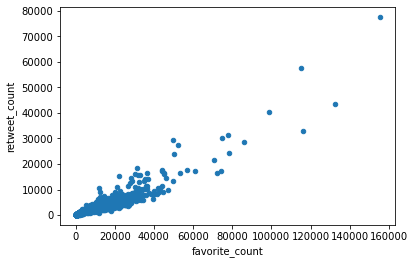

In [98]:
df.plot.scatter('favorite_count','retweet_count');

* `retweet_count` and `favorite_count` are positively correlated, when `favorite_count` increase `retweet_count` increase too.

<a id='inst2'></a>
* ## Insight 2: <a href="#top">^</a>

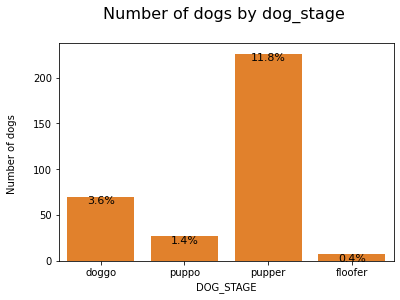

In [100]:

count_plot_one_vb(df,'dog_stage', 'Number of dogs',1)

The dog stage more mentioned in the text tweets is **Pupper**

In [101]:
df.groupby('dog_stage').rating_ratio.mean()

dog_stage
doggo      1.158571
floofer    1.200000
pupper     1.059969
puppo      1.214815
Name: rating_ratio, dtype: float64

The dog stage having a high rate is **Puppo**.

<a id='inst3'></a>
* ## Insight 3: <a href="#top">^</a>

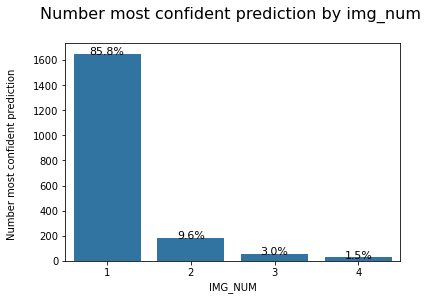

In [146]:
df.img_num = df.img_num.astype('str')
count_plot_one_vb(df,'img_num', 'Number most confident prediction',0)

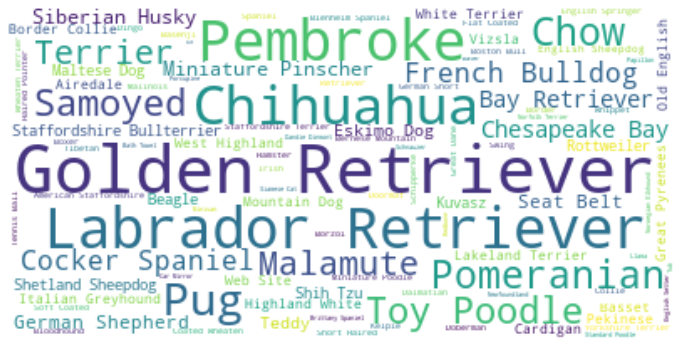

In [103]:
# lower max_font_size, change the maximum number of word and lighten the background:

text = " ".join(tweet for tweet in df.p1)

wordcloud = WordCloud( max_font_size=60, max_words=100, background_color="white").generate(text)

plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation="bilinear",)
plt.axis("off")
plt.show()

* The most 5 frequent dog breeds in our dataset are: Golden Retriever, Labrador Retriever, Pembroke, Chihuahua and Pug.

<a id='inst4'></a>
* ## Insight 4: <a href="#top">^</a>

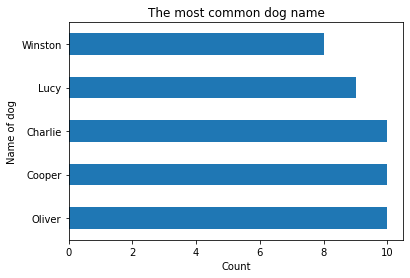

In [140]:

df['name'].value_counts()[0:5].plot(kind = 'barh')
plt.title('The most common dog name')
plt.xlabel('Count')
plt.ylabel('Name of dog');



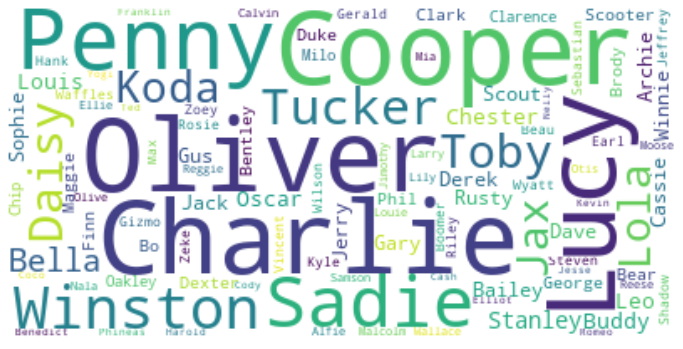

In [105]:
# word cloud
dog_names = df[df.name.notnull()]['name']
text = " ".join(tweet for tweet in dog_names)

wordcloud = WordCloud( max_font_size=60, max_words=100, background_color="white").generate(text)

plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation="bilinear",)
plt.axis("off")
plt.show()

* The most 5 common dog names in our dataset are: Charlie, Cooper, Oliver, Lucy and Penny

<a id='references'></a>
## 7) References <a href="#top">^</a>

* https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
* https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
* https://github.com/amueller/word_cloud